In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

In [4]:
df = pd.read_csv("diabetes.csv")

In [6]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


PART 1 QUESTION 2

This data set contains 768 measurements and 9 features. 

In [7]:
df["Age"].mean()

33.240885416666664

In [8]:
pd.value_counts(df[df["Outcome"] == 0]["Outcome"])

0    500
Name: Outcome, dtype: int64

PART 1 QUESTION 3

The mean age of the sample is 33 years.

500 out of 768 people in the sample do not have diabetes, and 268 people do have diabetes.

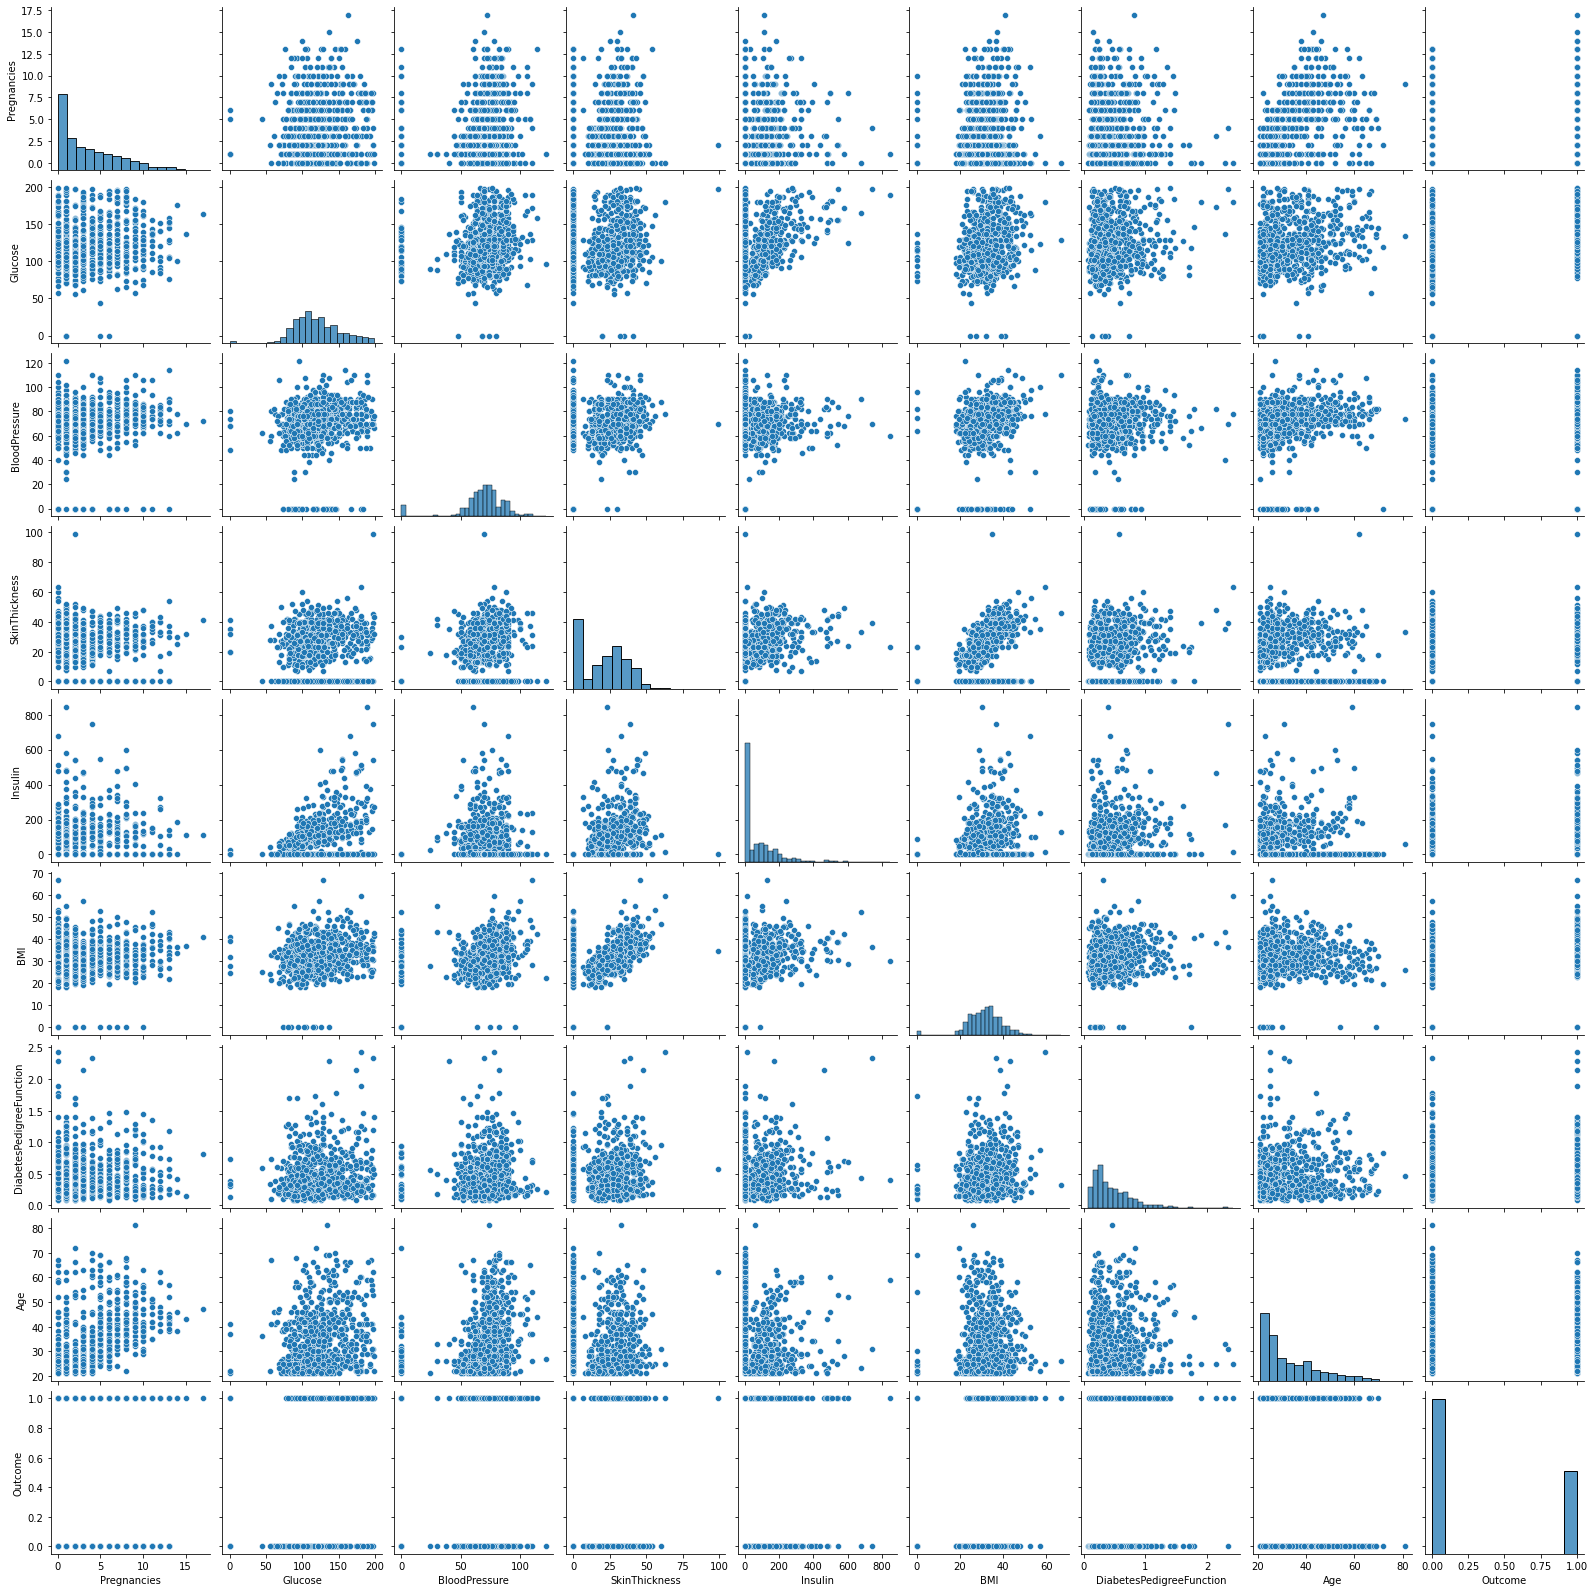

In [9]:
sns.pairplot(df)

PART 1 QUESTION 4

Something strange about the histograms for glucose, blood pressure, skin thickness, insulin, and BMI is that there are significantly high frequencies in the lowest bin. For living people, diabetic or not, values of 0 do not make sense for these features.

In [10]:
df.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

PART 1 QUESTION 4A

No, none of the features have any null or NA values.

In [11]:
df["Glucose"] = df["Glucose"].replace(0, np.NaN)
df["BloodPressure"] = df["BloodPressure"].replace(0, np.NaN)
df["SkinThickness"] = df["SkinThickness"].replace(0, np.NaN)
df["Insulin"] = df["Insulin"].replace(0, np.NaN)
df["BMI"] = df["BMI"].replace(0, np.NaN)

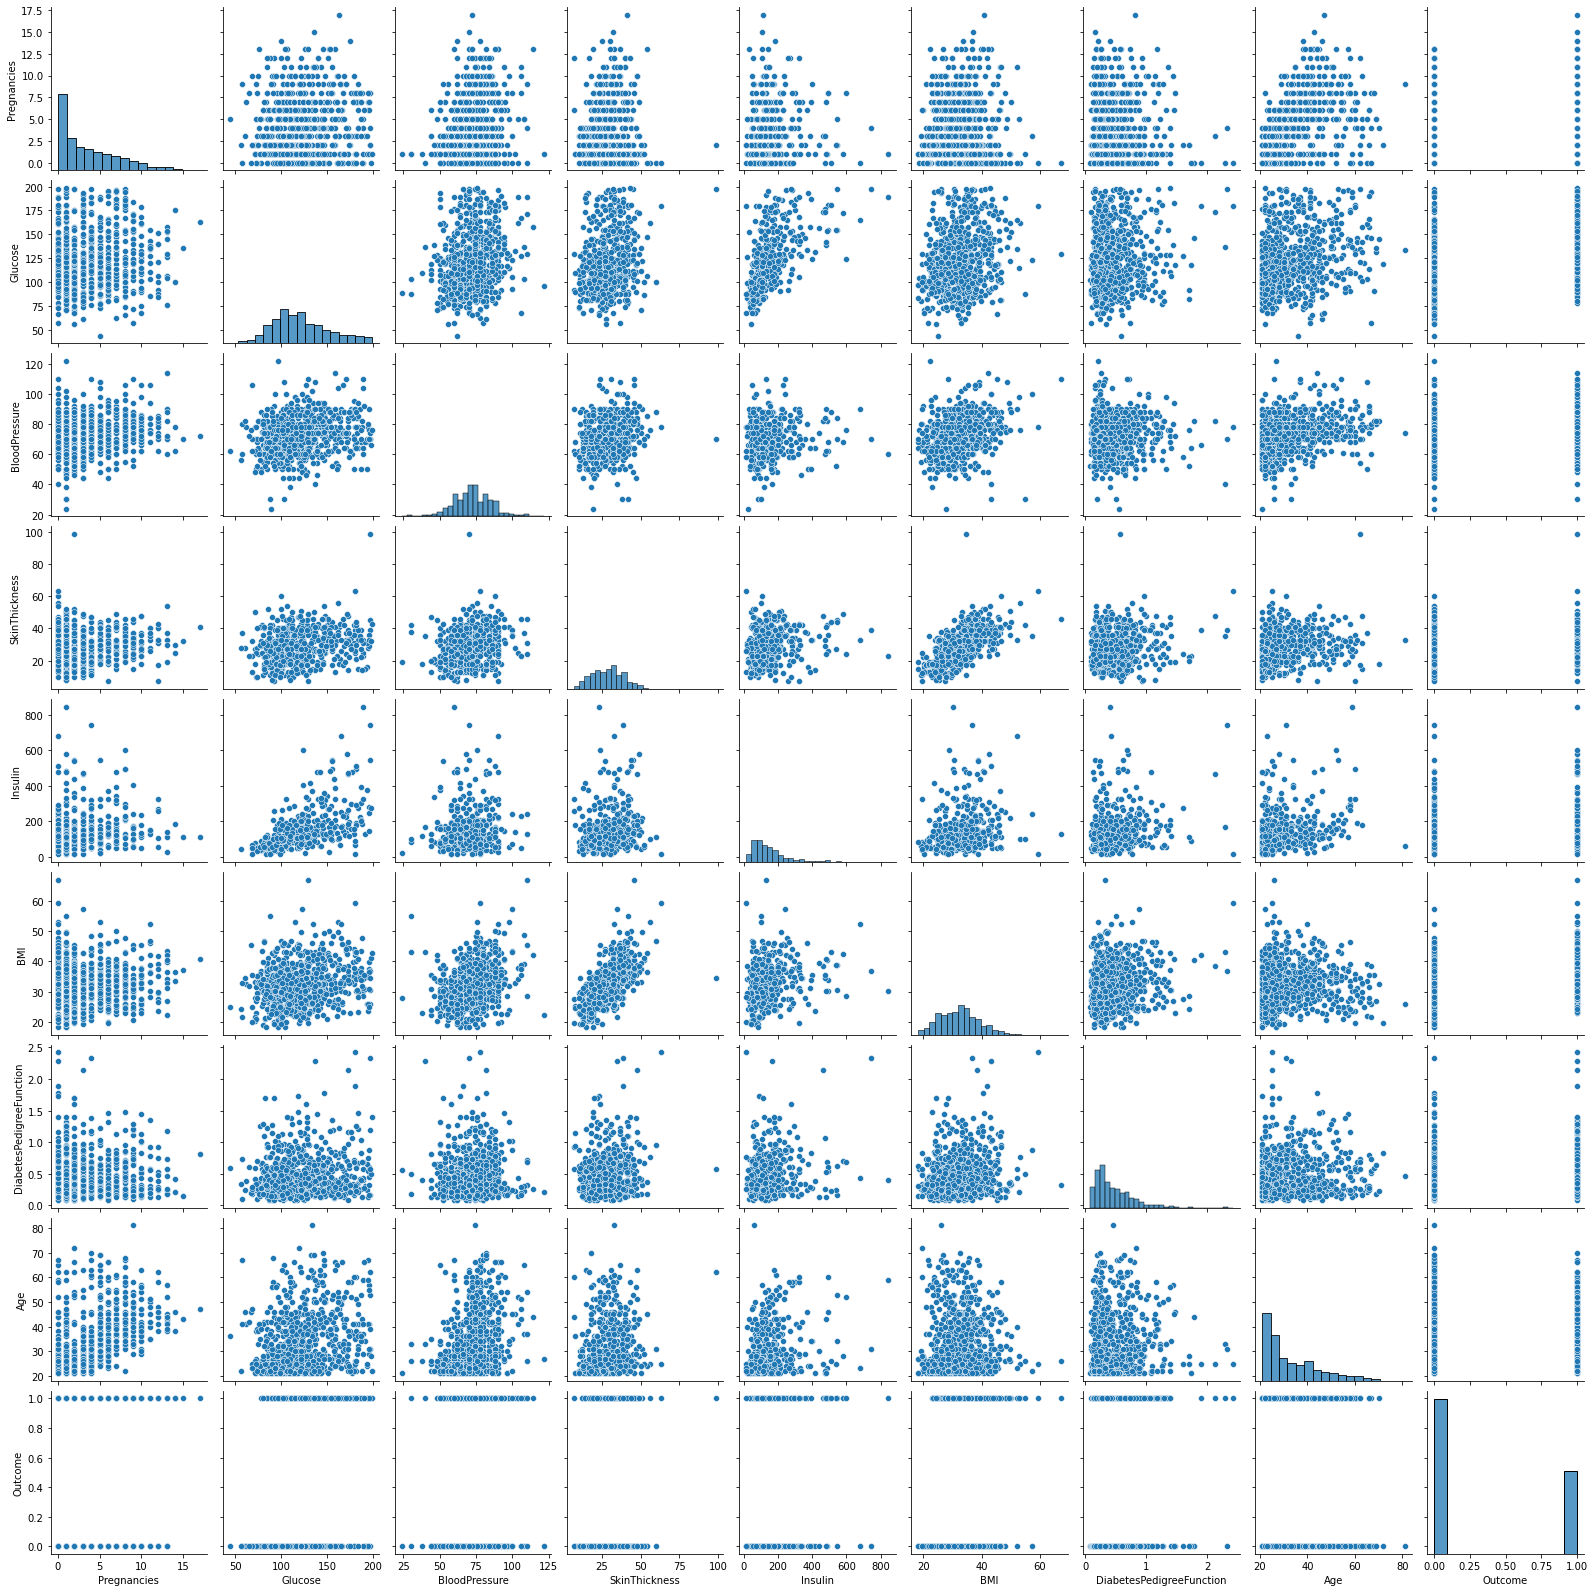

In [12]:
sns.pairplot(df)

In [13]:
df.isnull().any()

Pregnancies                 False
Glucose                      True
BloodPressure                True
SkinThickness                True
Insulin                      True
BMI                          True
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

PART 1 QUESTION 4B

The replace command replaced values of 0 with null values, which removed the 0 entries from the histogram and changed the distribution shape for glucose, blood pressure, skin thickness, insulin, and BMI. We did this to eliminate the unknown values from consideration so the histogram distributions reflect the recorded data.

In [14]:
df.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

PART 1 QUESTION 4C

This command tells me that unknown values were marked as "0" and replaced with null for glucose, blood pressure, skin thickness, insulin, and BMI. Only 5 values were replaced for glucose, but hundreds of values were replaced for insulin, revealing that the same level of information was not provided for each individual.

In [15]:
df['Glucose'].fillna(df['Glucose'].median(), inplace = True)
df['BloodPressure'].fillna(df['BloodPressure'].median(),inplace=True)
df['SkinThickness'].fillna(df['SkinThickness'].median(),inplace=True)
df['Insulin'].fillna(df['Insulin'].median(),inplace=True)
df['BMI'].fillna(df['BMI'].median(),inplace=True)

PART 1 QUESTION 4D

This command replaces the unknown null values with median values for glucose, blood pressure, skin thickness, insulin, and BMI.

Since from a biomedical standpoint we know values of 0 are impossible for glucose, blood pressure, skin thickness, insulin, and BMI, it is valid to replace them with null. It is also reasonable to guess that those individuals had median values, and then replace them with median values. However, from a data science standpoint, it may be necessary to remove those individuals from the data set altogether. For example, one individual may have diabetes. Their skin thickness is abnormally high, but was not recorded and thus was substituted with the median value. Their glucose levels are also abnormally high and were recorded. From the statistical analysis, this individual might show a correlation between glucose and diabetes but we would miss out on the correlation between skin thickness and diabetes too. So yes, this procedure is valid with a caveat because we're still missing data.

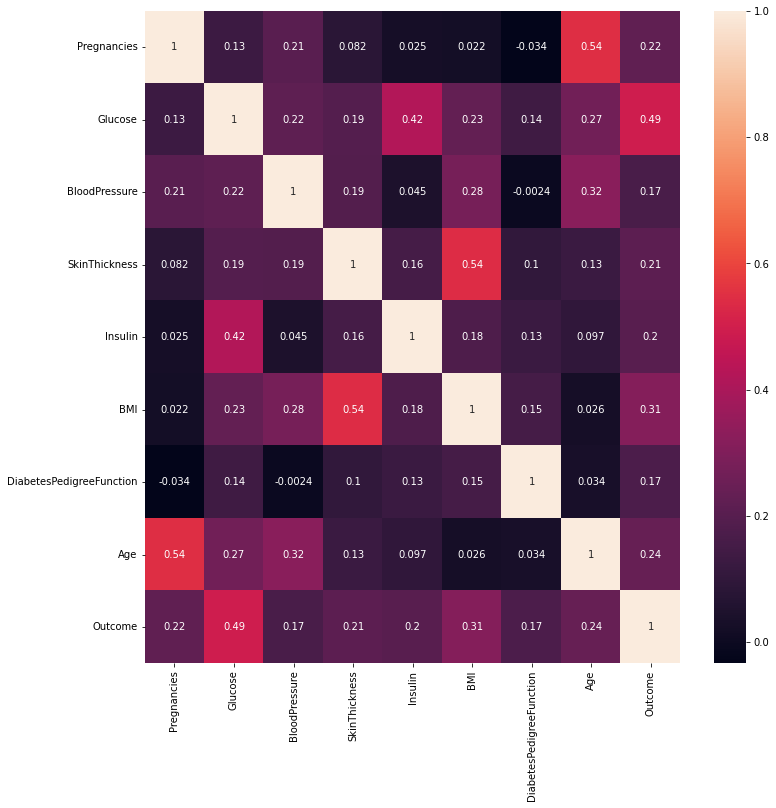

In [16]:
plt.figure(figsize = (12,12))
sns.heatmap(data = df.corr(), annot = True)
plt.show()

PART 1 QUESTION 5

Pregnancy & age and BMI & skin thickness have the strongest correlation.

Glucose has the strongest correlation with the outcome.

In [17]:
df[df["Outcome"] == 0]["BloodPressure"].mean()

70.92

In [18]:
df[df["Outcome"] == 1]["BloodPressure"].mean()

75.1231343283582

In [19]:
df.sort_values(by=["Outcome"])

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
383,1,90.0,62.0,18.0,59.0,25.1,1.268,25,0
465,0,124.0,56.0,13.0,105.0,21.8,0.452,21,0
466,0,74.0,52.0,10.0,36.0,27.8,0.269,22,0
467,0,97.0,64.0,36.0,100.0,36.8,0.600,25,0
469,6,154.0,78.0,41.0,140.0,46.1,0.571,27,0
...,...,...,...,...,...,...,...,...,...
193,11,135.0,72.0,29.0,125.0,52.3,0.578,40,1
485,0,135.0,68.0,42.0,250.0,42.3,0.365,24,1
484,0,145.0,72.0,29.0,125.0,44.2,0.630,31,1
186,8,181.0,68.0,36.0,495.0,30.1,0.615,60,1


In [20]:
# H0: blood pressure comes from a normal distribution
# H1: blood pressure does not come from a normal distribution
# alpha = 0.01

stats.normaltest(df['BloodPressure'])

# p < alpha
# reject H0, accept H1

NormaltestResult(statistic=21.014516861396352, pvalue=2.7337301565003257e-05)

In [21]:
# H0: the mean blood pressure of those without diabetes is the same as that of those with diabetes
# H1: the mean blood pressure of those without diabetes is the different from that of those with diabetes

stats.ttest_1samp(df[df["Outcome"] == 0]["BloodPressure"] , df[df["Outcome"] == 1]["BloodPressure"].mean())

# p < alpha
# reject H0, accept H1

Ttest_1sampResult(statistic=-7.878439899568901, pvalue=2.0912137191572403e-14)

PART 1 QUESTION 6

These two means are significantly different according to the t-test.

In [22]:
df.groupby("Outcome").mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,110.682000,70.920000,27.726000,127.792000,30.885600,0.429734,31.190000
1,4.865672,142.130597,75.123134,31.686567,164.701493,35.383582,0.550500,37.067164


PART 1 QUESTION 7 

Without running a t-test for each feature, at a glance it appears that all features' means vary between individuals who have diabetes and those who do not.

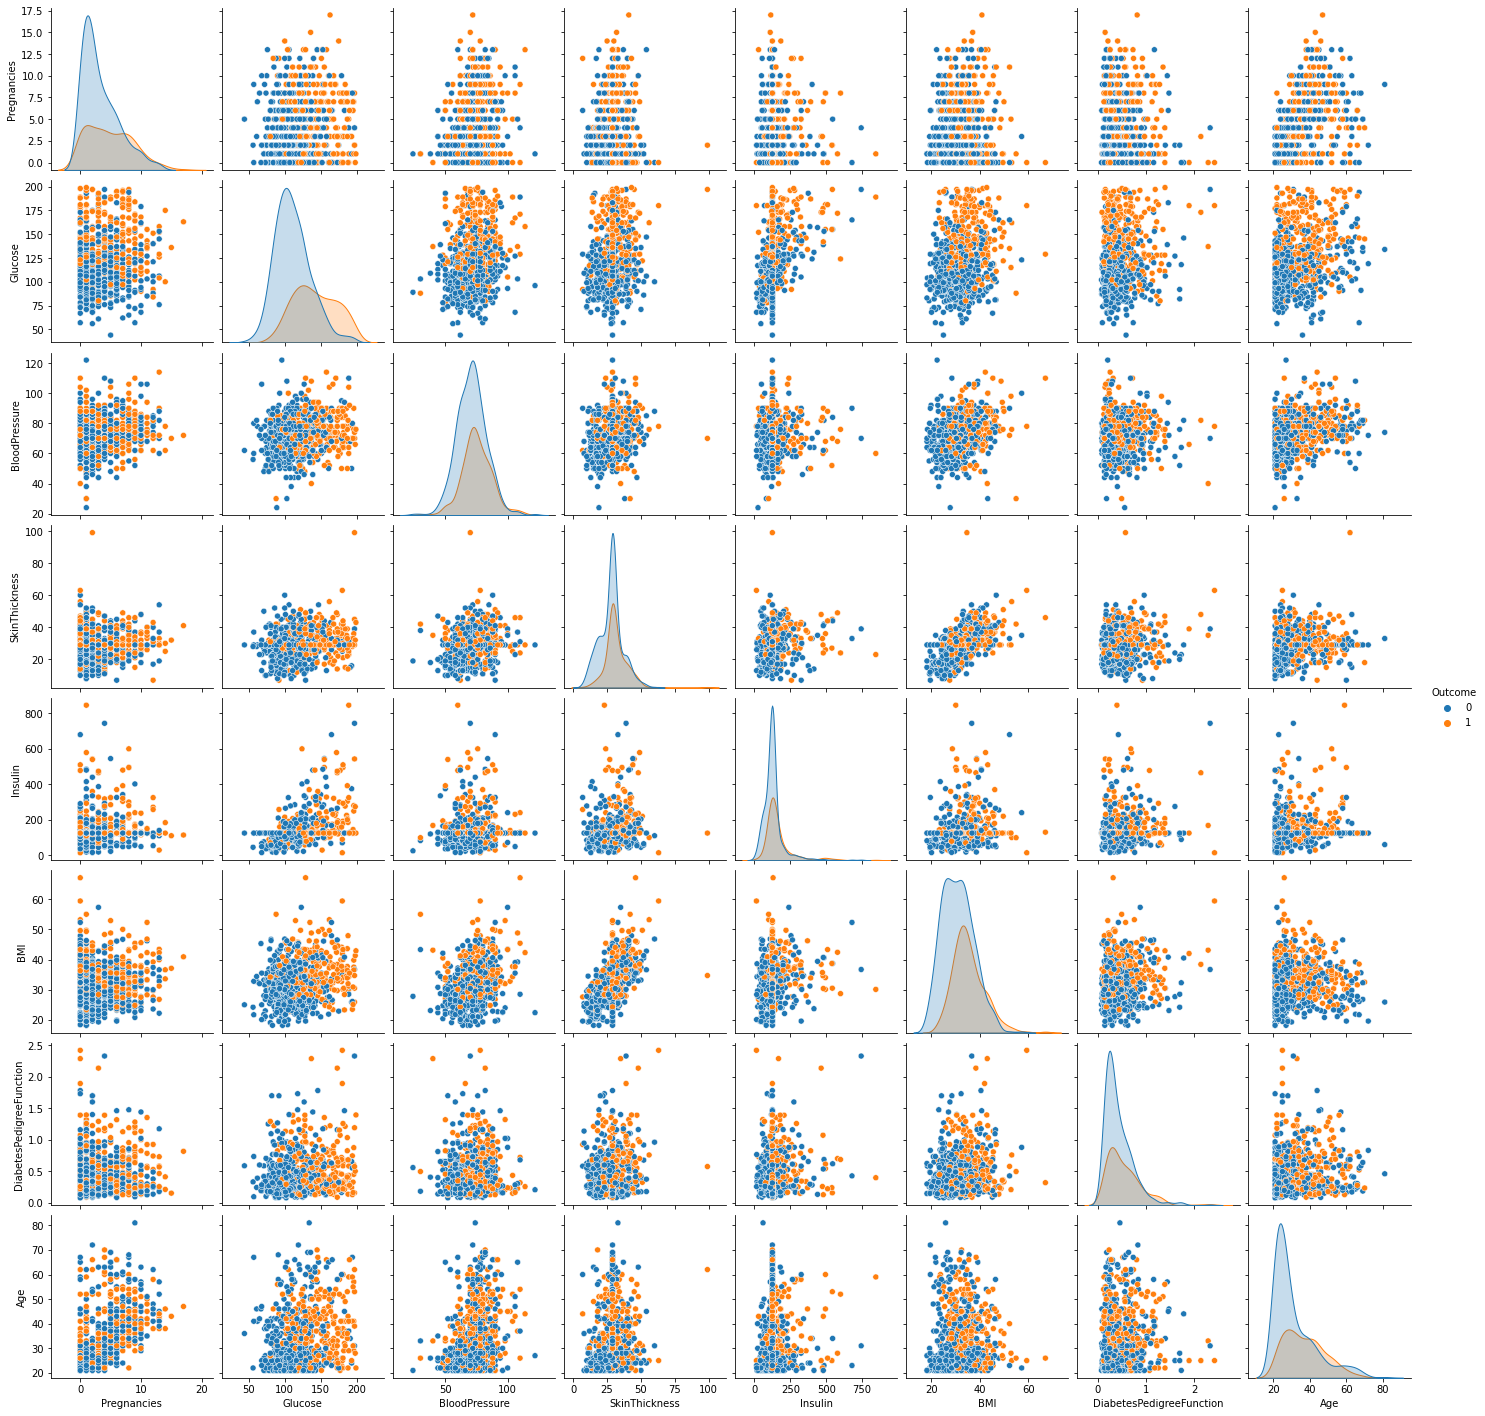

In [23]:
sns.pairplot(df, hue = "Outcome")

PART 1 QUESTION 8

This colored the data points for people with diabetes as orange and the data points for people without diabetes as blue. I notice that the peaks of the histograms for the different features roughly align, except for glucose, for which the orange peak is visibly higher than the blue peak. The glucose histogram also has a larger spread for those with diabetes than those without.

PART 2 QUESTION 1

People in this study with diabetes have greater variance in pregnancies, glucose, and age. People with diabetes also have a higher median value across all features - pregnancies, glucose, blood pressure, skin thickness, insulin, BMI, diabetes pedigree, and age. 

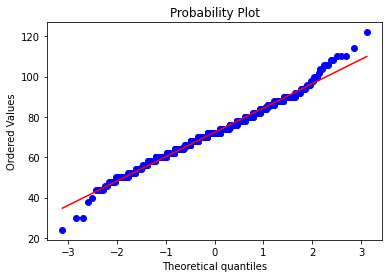

In [24]:
stats.probplot(df['BloodPressure'], plot = plt)
plt.show()

PART 2 QUESTION 1A

Using a QQ plot, no it does not appear that blood pressure data is normally distributed because there are heavy tails, meaning there is data more extreme than would be expected for a normal distribution. 

In [26]:
# H0: Blood pressure comes from a normal distribution
# H1: Blood pressure does not come from a normal distribution
# alpha = 0.01

stats.normaltest(df['BloodPressure'])

# p < alpha
# reject H0; accept H1

NormaltestResult(statistic=21.014516861396352, pvalue=2.7337301565003257e-05)

The null hypothesis is that the blood pressure data comes from a normal distribution, and the alternative hypothesis is that the blood pressure data does not come from a normal distribution. Given a p-value of 0.00002, p < alpha so the data is not from a normal distribution.

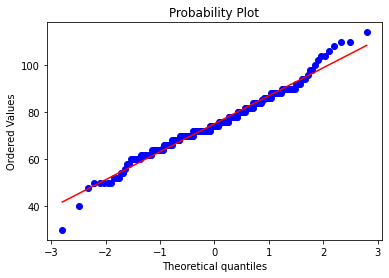

In [30]:
stats.probplot(df[df["Outcome"] == 1]["BloodPressure"], plot = plt)
plt.show()

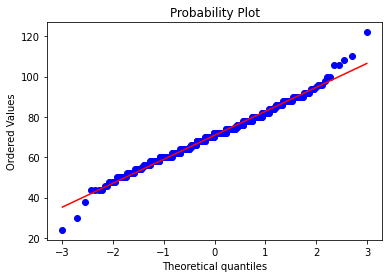

In [31]:
stats.probplot(df[df["Outcome"] == 0]["BloodPressure"], plot = plt)
plt.show()

PART 2 QUESTION 1B

Since question 1b appears to be a repeat, instead I have used a QQ plot for people with diabetes and those without separately. It appears that blood pressure is not normally distributed for people with diabetes as there are heavy tails. Blood pressure also appears not normally distributed for people without diabetes as there are heavy tails, although not as heavy as those for people with diabetes.

In [33]:
pop_mean = df['BloodPressure'].mean()

sample_size = 10
sample = np.random.choice(a = df['BloodPressure'], size = sample_size)
sample_mean = np.mean(sample)
np.percentile(sample, [2.5,97.5])

array([52.45, 84.65])

In [35]:
np.percentile(sample, [0.5,99.5])

array([52.09, 85.73])

In [36]:
print(pop_mean)
print(sample_mean)

72.38671875
66.9


PART 2 QUESTION 2

The 99% confidence interval is wider than the 95% confidence interval such that the boundaries capture more values. The population and sample mean fall within both the 95% and 99% confidence intervals.

In [37]:
# H0: the mean blood pressure of people without diabetes is the same as the whole population
# H1: the mean blood pressure of people without diabetes is the different from the whole population
# alpha = 0.01 

stats.ttest_1samp(df[df["Outcome"] == 0]["BloodPressure"] , 71)

# p > 0.01
# accept H0

Ttest_1sampResult(statistic=-0.1499536162128066, pvalue=0.8808618001852418)

PART 2 QUESTION 3A

The blood pressure of people without diabetes in this sample is not significantly different from the blood pressure of the population. 

In [39]:
# H0: the mean blood pressure of people with diabetes is the same as the whole population
# H1: the mean blood pressure of people with diabetes is the different from the whole population
# alpha = 0.01 

stats.ttest_1samp(df[df["Outcome"] == 1]["BloodPressure"] , 71)

# p < 0.01
# reject H0; accept H1

Ttest_1sampResult(statistic=5.647629811136108, pvalue=4.158548511042713e-08)

PART 2 QUESTION 3B

The blood pressure of people with diabetes in this sample is significantly different from the blood pressure of the population. 

In [40]:
# H0: the mean blood pressure of people with diabetes is the same as that of people without diabetes
# H1: the mean blood pressure of people with diabetes is the different from that of people without diabetes
# alpha = 0.01 

stats.ttest_ind(df[df["Outcome"] == 1]["BloodPressure"] , df[df["Outcome"] == 0]["BloodPressure"])

# p < 0.01
# reject H0; accept H1

Ttest_indResult(statistic=4.65097622072597, pvalue=3.8908354906479115e-06)

PART 2 QUESTION 3C

The mean blood pressure of people with diabetes and that of people without diabetes are significantly different.

In [41]:
# H0: the mean glucose level of people without diabetes is the same as the whole population
# H1: the mean glucose level of people without diabetes is the different from the whole population
# alpha = 0.01 

stats.ttest_1samp(df[df["Outcome"] == 0]["Glucose"] , 110)

# p > 0.01
# accept H0

Ttest_1sampResult(statistic=0.6172283043277479, pvalue=0.5373656835106907)

PART 2 QUESTION 4A

The glucose level of people without diabetes in this sample is not significantly different from the glucose level of the population. 

In [42]:
# H0: the mean glucose level of people with diabetes is the same as the whole population
# H1: the mean glucose level of people with diabetes is the different from the whole population
# alpha = 0.01 

stats.ttest_1samp(df[df["Outcome"] == 1]["Glucose"] , 110)

# p < 0.01
# reject H0; accept H1

Ttest_1sampResult(statistic=17.789016013683774, pvalue=3.145088204392815e-47)

PART 2 QUESTION 4B

The glucose level of people with diabetes in this sample is significantly different from the glucose level of the population. 

In [43]:
# H0: the mean glucose level of people with diabetes is the same as that of people without diabetes
# H1: the mean glucose level of people with diabetes is the different from that of people without diabetes
# alpha = 0.01 

stats.ttest_ind(df[df["Outcome"] == 1]["Glucose"] , df[df["Outcome"] == 0]["Glucose"])

# p < 0.01
# reject H0; accept H1

Ttest_indResult(statistic=15.673795182294105, pvalue=3.1287190418423694e-48)

PART 2 QUESTION 4C

The mean glucose level of people with diabetes and that of people without diabetes are significantly different.

In [44]:
# H0: the mean BMI of people with diabetes is the same as that of people without diabetes
# H1: the mean BMI of people with diabetes is the different from that of people without diabetes
# alpha = 0.01 

stats.ttest_ind(df[df["Outcome"] == 1]["BMI"] , df[df["Outcome"] == 0]["BMI"])

# p < 0.01
# reject H0; accept H1

Ttest_indResult(statistic=9.090064413986648, pvalue=8.336902677509037e-19)

PART 2 QUESTION 5

The mean BMI of people with diabetes and that of people without diabetes are significantly different.

PART 3 CONCLUSIONS

The majority of the dataset does not have diabetes. From the pair plot, pregnancies and age appear strongly skewed right. From the heat map, glucose has the strongest correlation with outcome. Age and pregnancies as well as BMI and skin thickness also have strong correlations. Blood pressure is not normally distributed. Blood pressure, glucose levels, and BMI are significantly different between people with and without diabetes. 

From running these statistical tests, I learned the importance of data clean up (i.e. removing erroneous "0" values and replacing with reasonable, average values) prior to analysis as well as the convenience and application of 1 sample and 2 sample t-tests to determine differences between data sets. These t-tests told me that blood pressure, glucose, and BMI may have a correlation with diabetes as their levels differ significantly between people with and without diabetes.